In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import math
PI = math.pi
TAU = math.pi*2

In [3]:
def constrain_to_pi(angle):
    while angle > PI:
        angle -= TAU
    while angle < -PI:
        angle += TAU
    return angle

def constrain_to_tau(angle):
    # while angle > TAU:
    #     angle -= TAU
    # while angle < 0:
    #     angle += TAU
    # return angle
    return angle % TAU


In [4]:
from manim import *
fig8_1 = Circle(radius=40, color=GREY)
fig8_2 = Circle(radius=40, color=GREY)
fig8_1.rotate(PI*2)
fig8_1.move_to(40*UP)
fig8_2.move_to(40*DOWN)
fig8 = Group(fig8_1, fig8_2)

figinf_1 = Circle(radius=40, color=GREY)
figinf_2 = Circle(radius=40, color=GREY)
figinf_1.move_to(40*RIGHT)
figinf_2.move_to(40*LEFT)
figinf = Group(figinf_1, figinf_2)
        
circle = Circle(radius=80, color=GREY)

def circlephase(phase):
    phase = constrain_to_tau(phase)
    return circle.point_at_angle(-phase)[:2]

def fig8phase(phase):
    phase = constrain_to_tau(phase)
    if phase <= PI:
        return fig8_1.point_at_angle(3/2*PI - 2*phase)[:2]
    else:
        return fig8_2.point_at_angle(-3/2*PI + 2*phase)[:2]

def figinfphase(phase):
    phase = constrain_to_tau(phase)
    if phase <= PI:
        return figinf_1.point_at_angle(PI - 2*phase)[:2]
    else:
        return figinf_2.point_at_angle(2*phase)[:2]

Manim Community v0.18.0.post0

In [5]:
def display(dfs, size=10):
    plt.figure(figsize=(size,size))
    for df in dfs:
        plt.scatter(df['x'], df['y'], s=.5)
    plt.gca().set_aspect('equal')
    plt.grid()
    plt.show()

def velocity(dfs, size=10):
    fig = plt.figure(figsize=(size,size))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_yticks(np.arange(0.9, 1.55, 0.05))
    ax.set_yticks(np.arange(0.9, 1.55, 0.025), minor=True)
    ax.grid(visible=True, which='both')
    for df in dfs:
        v = []
        for i in range(df.shape[0]-1):
            prev = df.iloc[i]
            curr = df.iloc[i+1]
            v.append(np.sqrt((prev['x']-curr['x'])**2 + (prev['y']-curr['y'])**2))
        ax.plot(v)

In [6]:
reverse = pd.read_csv('reverse.csv')
reverse

,x,y,phase
0,79.487,-9.043,0.018031
1,79.367,-10.036,0.020020
2,79.236,-11.028,0.022010
3,79.092,-12.017,0.023999
4,78.935,-13.005,0.025989
...,...,...,...
519,43.054,67.426,0.840443
520,42.207,67.959,0.838454
521,41.355,68.481,0.836464
522,40.495,68.993,0.834475


In [7]:
initial = reverse.iloc[0]
phase = initial['phase'] * TAU

locs = []

# omega = v/r
onPath = True
rev = 1
v_angle = -PI/2 - phase

# max_delta_angle =  1.025/10
max_delta_angle =  0.105

deg = 180/PI

for i in range(reverse.shape[0]):
    
    # reverse event
    if i == 240:
        onPath = False
        phase -= PI/5
        rev = -1
    
    phase += 1.0/80 * rev
    
    target = circlephase(phase)

    if onPath:
        locs.append(target)
        v_angle = -PI/2 - phase

    if not onPath:
        target = circlephase(phase)
        curr_loc = locs[-1]
        delta_x = target[0] - curr_loc[0]
        delta_y = target[1] - curr_loc[1]
        angle = math.atan2(delta_y, delta_x)
        angle_diff = constrain_to_pi(angle - v_angle)
        
        if abs(angle_diff) < max_delta_angle:
            v_angle += np.sign(angle_diff) * angle_diff
        else:
            v_angle += np.sign(angle_diff) * max_delta_angle
        v_angle = constrain_to_pi(v_angle)
        v = 1.2 # speed off the Path
        locs.append([curr_loc[0] + v*math.cos(v_angle), curr_loc[1] + v*math.sin(v_angle)])
    
        dist_squared = (target[0] - curr_loc[0])**2 + (target[1] - curr_loc[1])**2
        # if dist_squared < 1.75 and abs(angle_diff) < 0.0153:
        if dist_squared < 1:
            print(angle_diff)
            onPath = True

predicted = pd.DataFrame(locs)
predicted = predicted.rename(columns={0:'x',1:'y'})

0.015236687324182041


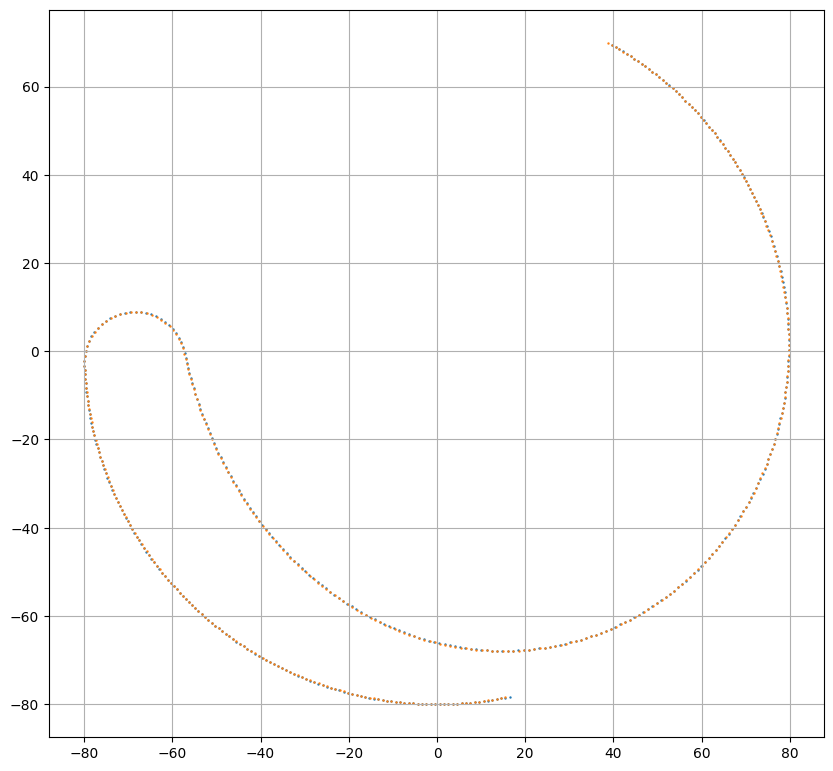

In [8]:
display([reverse[100:],predicted[100:]])

0.01945422994091861


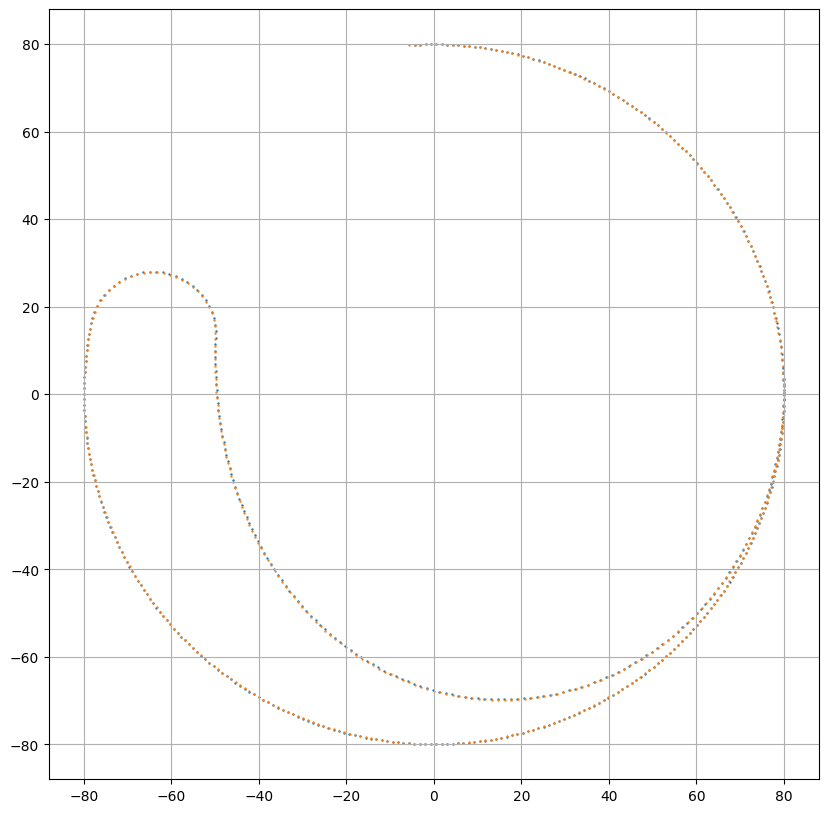

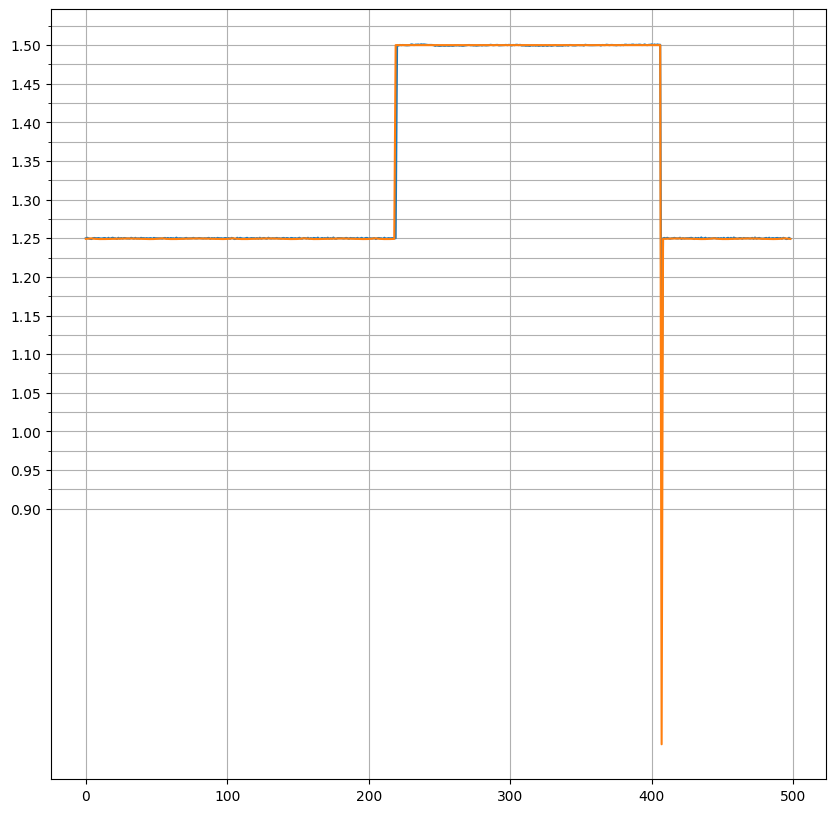

In [34]:
shredder = pd.read_csv('shredder_reverse.csv')

initial = shredder.iloc[0]
phase = initial['phase'] * TAU

locs = []

# omega = v/r
onPath = True
rev = 1
v_angle = -PI/2 - phase

# max_delta_angle =  1.025/10
max_delta_angle =  0.105

deg = 180/PI

v_base = 1.25

for i in range(shredder.shape[0]):
    
    # reverse event
    if i == 220:
        onPath = False
        phase -= PI/5
        rev = -1
    
    phase += v_base/80 * rev
    
    target = circlephase(phase)

    if onPath:
        locs.append(target)
        v_angle = -PI/2 - phase

    if not onPath:
        target = circlephase(phase)
        curr_loc = locs[-1]
        delta_x = target[0] - curr_loc[0]
        delta_y = target[1] - curr_loc[1]
        angle = math.atan2(delta_y, delta_x)
        angle_diff = constrain_to_pi(angle - v_angle)
        
        if abs(angle_diff) < max_delta_angle:
            v_angle += np.sign(angle_diff) * angle_diff
        else:
            v_angle += np.sign(angle_diff) * max_delta_angle
        v_angle = constrain_to_pi(v_angle)
        v = 1.2 * v_base # speed off the Path
        locs.append([curr_loc[0] + v*math.cos(v_angle), curr_loc[1] + v*math.sin(v_angle)])
    
        dist_squared = (target[0] - curr_loc[0])**2 + (target[1] - curr_loc[1])**2
        # if dist_squared < 1.75 and abs(angle_diff) < 0.0153:
        if dist_squared < 1:
            print(angle_diff)
            onPath = True

predicted = pd.DataFrame(locs)
predicted = predicted.rename(columns={0:'x',1:'y'})

display([shredder[:500], predicted[:500]])
# velocity([shredder[:500], predicted[:500]])
velocity([shredder[:500], predicted[:500]])

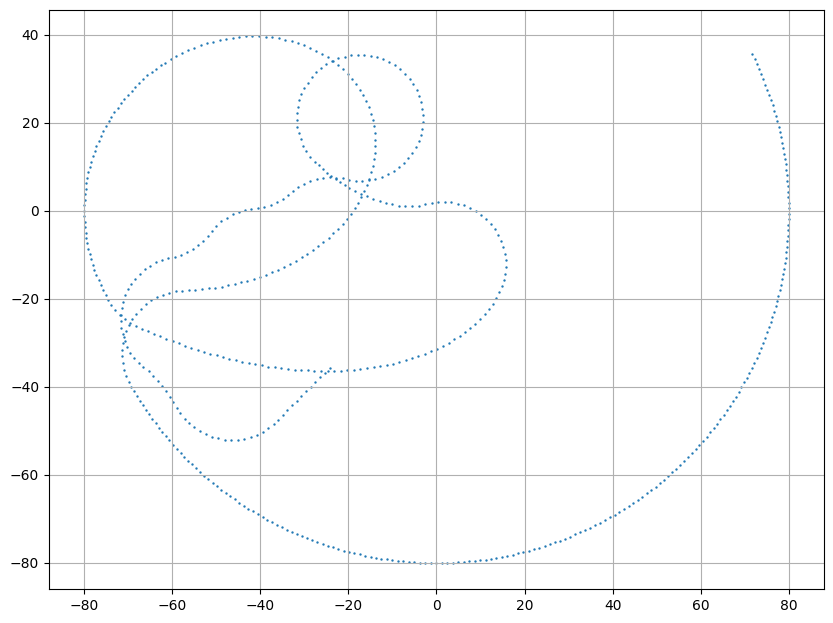

x             71.695
y             35.493
phase       0.926839
pathName      Circle
Name: 0, dtype: object

In [18]:
plisp = pd.read_csv('plisp.csv')
display([plisp[:600]])
# plt.plot(plisp['phase'])
events = {}
for i in range(1, plisp.shape[0]):
    curr = plisp.iloc[i]
    prev = plisp.iloc[i-1]
    if curr['pathName'] != prev['pathName']:
        events[i] = curr['pathName']
plisp.iloc[0]

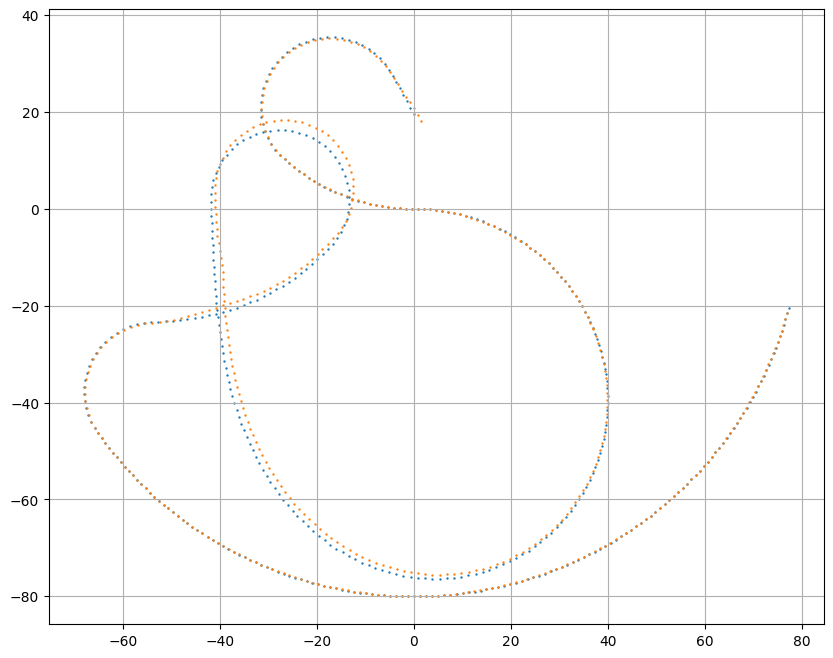

In [ ]:
# line number
FigureInfinite = [148, 591, 653, 679, 693, 705, 716, 985, 1042, 1065, 1078, 1091, 1103, 1175, 1658]
Circle = [412, 475, 488, 501, 514, 556, 828, 882, 894, 906, 917, 927, 1158, 1231, 1285]
FigureEight = [192, 454, 481, 495, 509, 520, 604, 672, 685, 699, 710, 762, 859, 888, 901, 913, 922, 998, 1058, 1071, 1084, 1097, 1108, 1200, 1260]
reverse = 1438

impressive = pd.read_csv('impressive.csv')

initial = impressive.iloc[0]
phase = initial['phase'] * TAU

locs = []
targeting = initial['pathName']

onPath = True
rev = 1
v_angle = -PI/2 - phase

max_delta_angle =  0.105

deg = 180/PI
v_base = 1.25

for i in range(impressive.shape[0]):
    
    # reverse event
    if i == reverse:
        onPath = False
        phase -= PI/5
        rev = -1
    # targeting change event
    dt = 2
    
    if i+dt in FigureInfinite:
        targeting = 'FigureInfinite'
        onPath = False
    elif i+dt in FigureEight:
        targeting = 'FigureEight'
        onPath = False
    elif i+dt in Circle:
        targeting = 'Circle'
        onPath = False
    
    
    phase += v_base/80 * rev
    
    if targeting == 'Circle':
        target = circlephase(phase)
    elif targeting == 'FigureEight':
        target = fig8phase(phase)
    elif targeting == 'FigureInfinite':
        target = figinfphase(phase)
    

    
    if onPath:
        locs.append(target)
        phi = constrain_to_tau(phase)
        if targeting == 'Circle':
            v_angle = -PI/2 - phi
        elif targeting == 'FigureEight':
            if phi < PI:
                v_angle = PI - 2*phi
            else:
                v_angle = 2*(phi-PI) - PI
        elif targeting == 'FigureInfinite':
            if phi < PI:
                v_angle = PI/2 - 2*phi
            else:
                v_angle = 2*phi + PI/2
        if rev == -1:
            v_angle -= PI

    if not onPath:
        curr_loc = locs[-1]
        delta_x = target[0] - curr_loc[0]
        delta_y = target[1] - curr_loc[1]
        angle = math.atan2(delta_y, delta_x)
        angle_diff = constrain_to_pi(angle - v_angle)
        
        if abs(angle_diff) < max_delta_angle:
            v_angle += np.sign(angle_diff) * angle_diff
        else:
            v_angle += np.sign(angle_diff) * max_delta_angle
        v_angle = constrain_to_pi(v_angle)
        v = 1.2 * v_base # speed off the Path
        locs.append([curr_loc[0] + v*math.cos(v_angle), curr_loc[1] + v*math.sin(v_angle)])
    
        dist_squared = (target[0] - curr_loc[0])**2 + (target[1] - curr_loc[1])**2
        # if dist_squared < 1.75 and abs(angle_diff) < 0.0153:
        
        if dist_squared < 0.5: # slightly stricter check
            
            onPath = True

predicted = pd.DataFrame(locs)
predicted = predicted.rename(columns={0:'x',1:'y'})
display([impressive[:450], predicted[:450]])
# velocity([shredder[:500], predicted[:500]])
# velocity([impressive[:500], predicted[:500]])

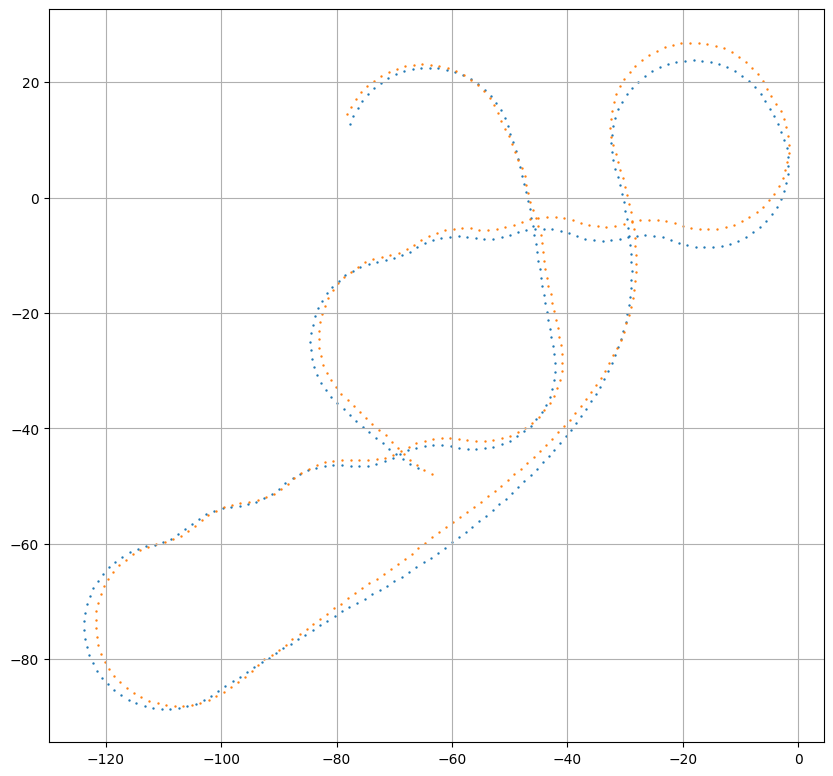

In [ ]:
start = 600
cutoff = 949
display([impressive[start:cutoff], predicted[start:cutoff]])


In [1]:
infinite_loop = pd.read_csv('infinite_loop.csv')
velocity([infinite_loop])

NameError: name 'pd' is not defined

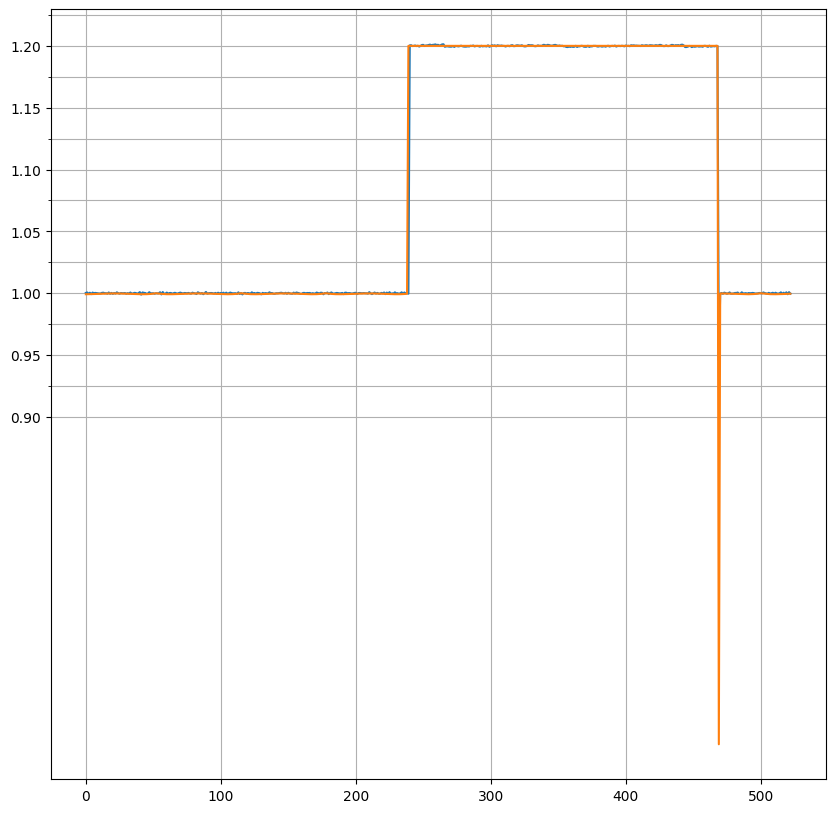

In [ ]:
velocity([reverse,predicted])

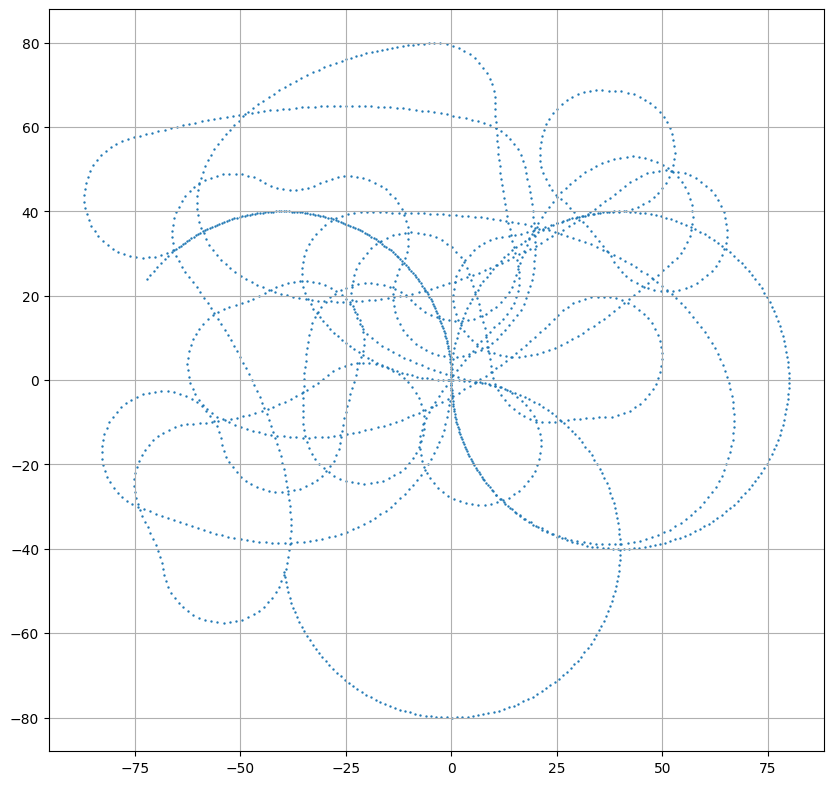

(2037, 4)

In [ ]:
# funky = pd.read_csv('2_woor.csv')
funky = pd.read_csv('logs_deflation_2.csv')
display([funky])
funky.shape


In [ ]:
one_eighty = pd.read_csv('180.csv')

In [ ]:
initial = one_eighty.iloc[1]
phase = initial['phase'] * TAU

locs = [[one_eighty.iloc[0]['x'], one_eighty.iloc[0]['y']]]

onPath = False
rev = 1
v_angle = math.atan2((one_eighty.iloc[1]['y']-one_eighty.iloc[0]['y']),(one_eighty.iloc[1]['x']-one_eighty.iloc[0]['x']))

# max_delta_angle =  1.025/10
max_delta_angle =  0.105

for i in range(one_eighty.shape[0]):
    
    phase += 1.0/80 * rev
    
    target = fig8phase(phase)

    if onPath:
        locs.append(target)
        v_angle = -PI/2 - phase

    if not onPath:
        target = fig8phase(phase)
        curr_loc = locs[-1]
        delta_x = target[0] - curr_loc[0]
        delta_y = target[1] - curr_loc[1]
        angle = math.atan2(delta_y, delta_x)
        angle_diff = constrain_to_pi(angle - v_angle)
        
        if abs(angle_diff) < max_delta_angle:
            v_angle += np.sign(angle_diff) * angle_diff
        else:
            v_angle += np.sign(angle_diff) * max_delta_angle
        v_angle = constrain_to_pi(v_angle)
        v = 1.2 # speed off the Path
        locs.append([curr_loc[0] + v*math.cos(v_angle), curr_loc[1] + v*math.sin(v_angle)])
    
        dist_squared = (target[0] - curr_loc[0])**2 + (target[1] - curr_loc[1])**2
        # if dist_squared < 1.75 and abs(angle_diff) < 0.0153:
        if dist_squared < 1:
            print(angle_diff * deg)
            print(i)
            onPath = True

predicted = pd.DataFrame(locs)
predicted = predicted.rename(columns={0:'x',1:'y'})

-148.8521660056036
61


In [ ]:
e = []
initial = one_eighty.iloc[1]
phase = initial['phase'] * TAU
for i in range(one_eighty.shape[0]):
    
    phase += 1.0/80 * rev
    
    e.append(fig8phase(phase))
e = pd.DataFrame(e)
e = e.rename(columns={0:'x',1:'y'})

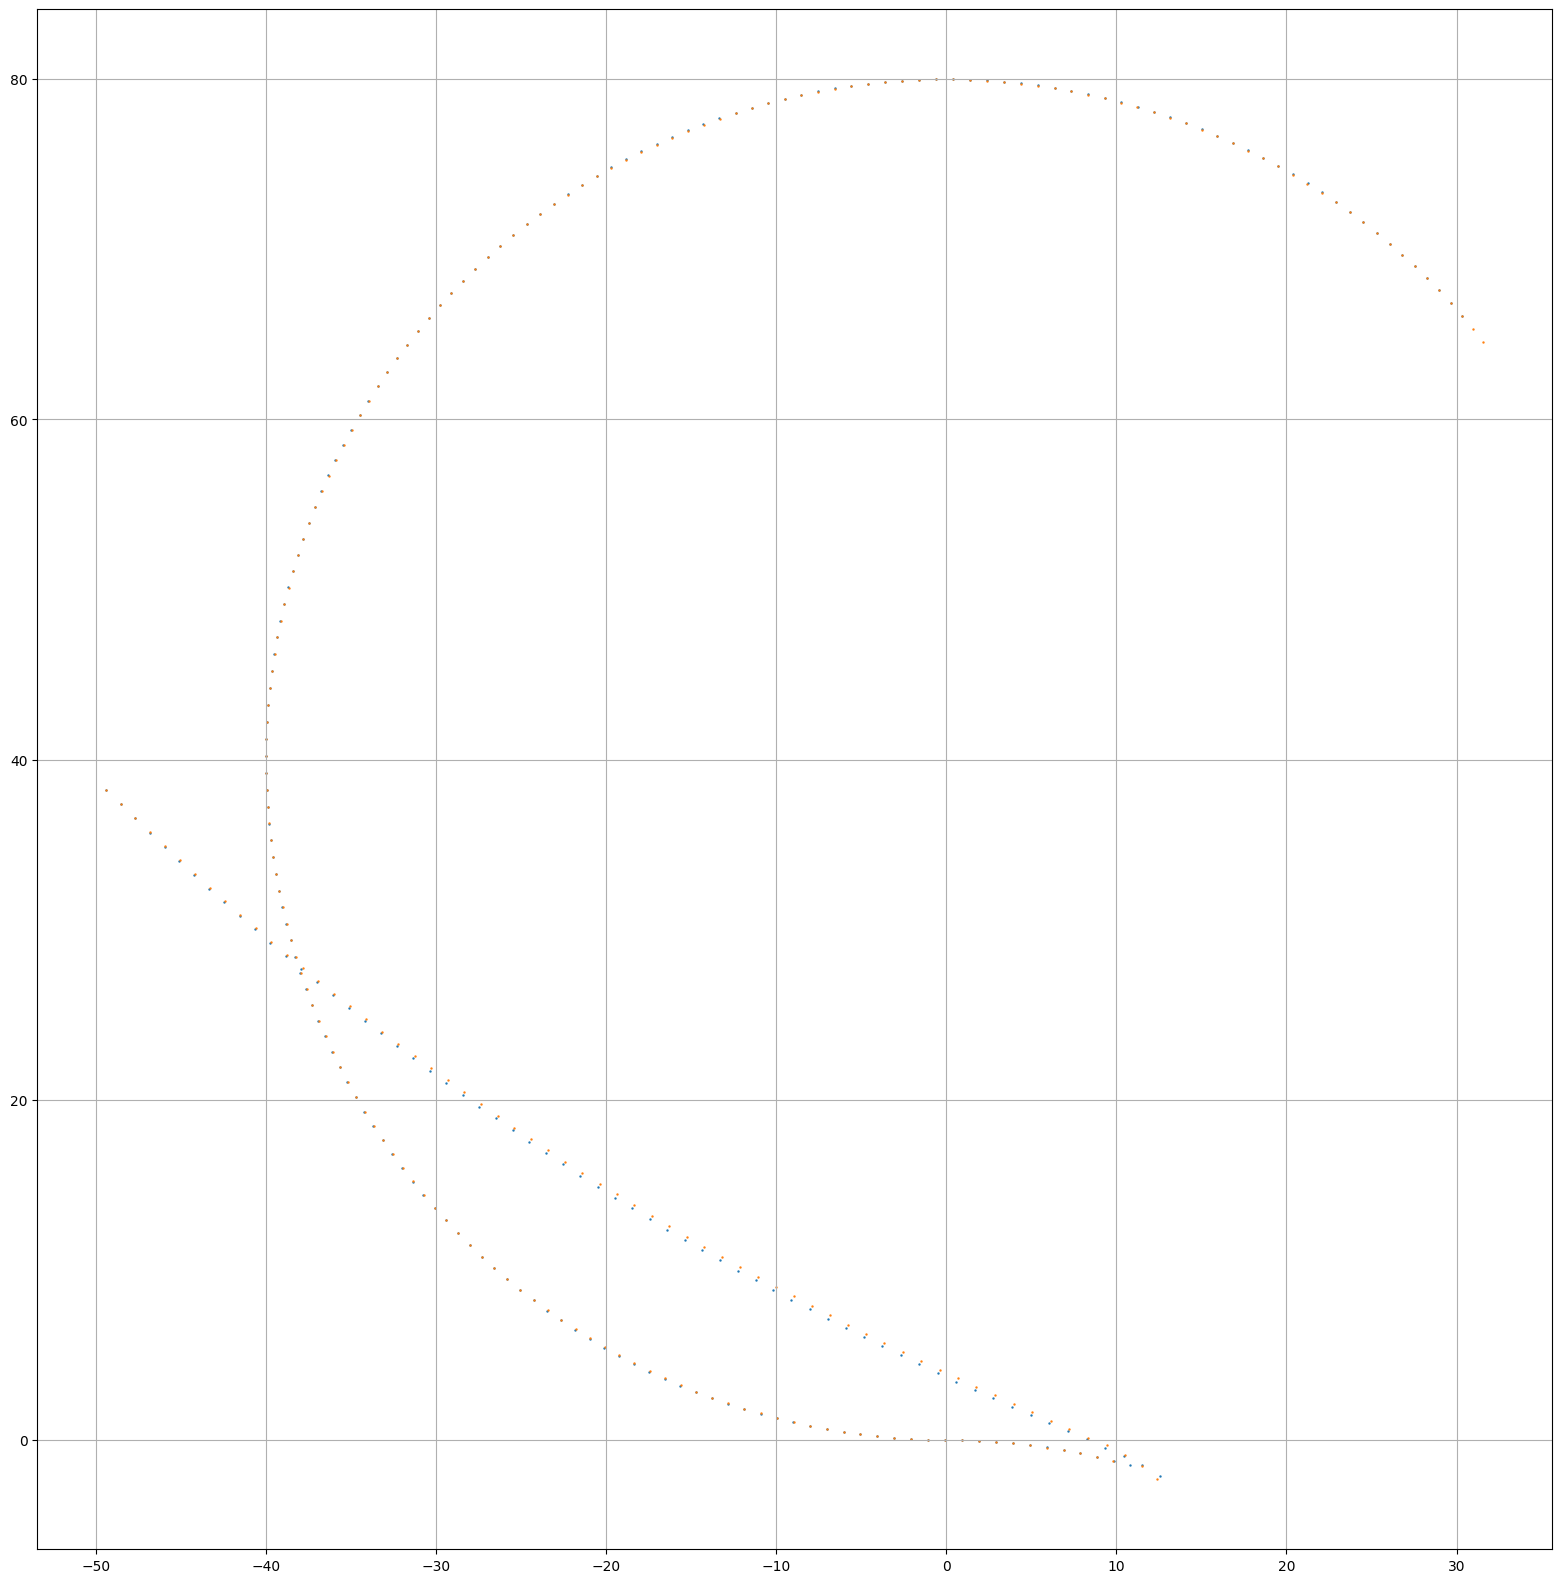

In [ ]:
plt.figure(figsize=(20,20))
cutoff=-1
plt.scatter(one_eighty['x'][:cutoff], one_eighty['y'][:cutoff], s=.5)
# plt.scatter(e['x'][:cutoff], e['y'][:cutoff], s=.5)
plt.scatter(predicted['x'][:cutoff], predicted['y'][:cutoff], s=.5)
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

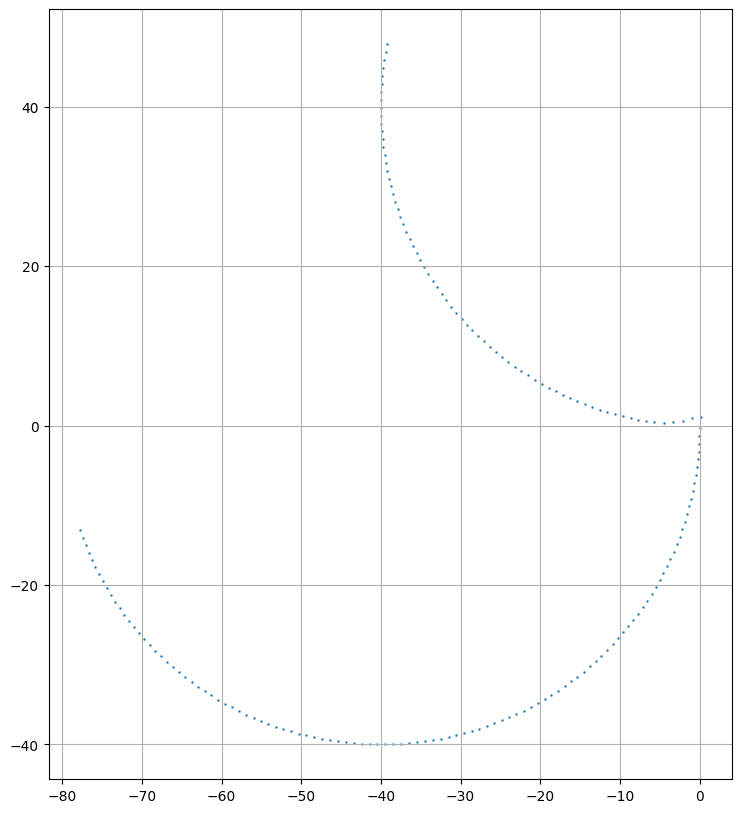

In [ ]:
ninety = pd.read_csv('90.csv')
display([ninety])


In [ ]:
initial = ninety.iloc[0]
phase = initial['phase'] * TAU

locs = []

onPath = True
rev = -1
v_angle = 0
path = '8'

# max_delta_angle =  1.025/10
max_delta_angle =  0.105

deg = 180/PI


for i in range(ninety.shape[0]):
    
    # reverse event
    if i == 65:
        onPath = False
        # phase -= PI/5
        # rev = -1
        path = 'Infinity'
    
    phase += 1.0/80 * rev
    
    target = None
    if path == 'Infinity':
        target = figinfphase(phase)
    elif path == '8':
        target = fig8phase(phase)

    if onPath:
        locs.append(target)
        
        # initialize v_angle
        if len(locs) < 2:
            continue
        prev_loc = locs[-2]
        delta_x = target[0] - prev_loc[0]
        delta_y = target[1] - prev_loc[1]
        v_angle = math.atan2(delta_y, delta_x)
        
    if not onPath:
        curr_loc = locs[-1]
        delta_x = target[0] - curr_loc[0]
        delta_y = target[1] - curr_loc[1]
        angle = math.atan2(delta_y, delta_x)
        angle_diff = constrain_to_pi(angle - v_angle)
        
        if abs(angle_diff) < max_delta_angle:
            v_angle += np.sign(angle_diff) * angle_diff
        else:
            v_angle += np.sign(angle_diff) * max_delta_angle
        
        v_angle = constrain_to_pi(v_angle)
        
        
        
        v = 1.2 # speed off the Path
        locs.append([curr_loc[0] + v*math.cos(v_angle), curr_loc[1] + v*math.sin(v_angle)])
    
        dist_squared = (target[0] - curr_loc[0])**2 + (target[1] - curr_loc[1])**2
        # if dist_squared < 1.75 and abs(angle_diff) < 0.0153:
        if dist_squared < 1:
            print(angle_diff)
            onPath = True
    
predicted = pd.DataFrame(locs)
predicted = predicted.rename(columns={0:'x',1:'y'})

-0.4351140774588227


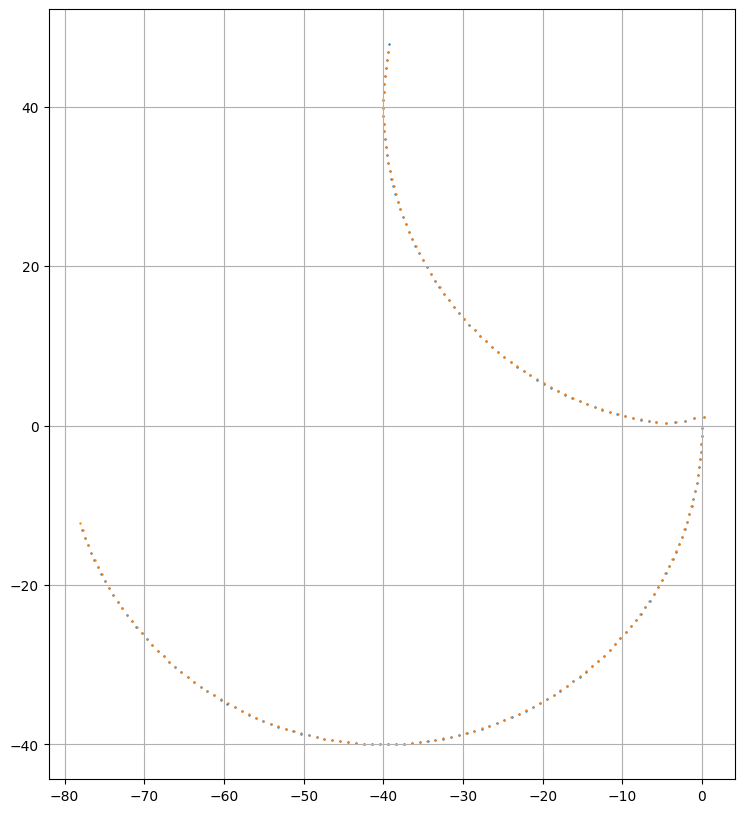

In [ ]:
display([ninety, predicted])

In [11]:
cp = pd.read_csv('CPC.csv')
# plt.figure(figsize=(10,10))
# plt.plot(cp['phase'][:500])
cp['x'].max()- cp['x'].min()
# display([cp])


179.99976

In [ ]:
velocity([cp])


In [40]:
infinite_loop = pd.read_csv('infinite_loop.csv')
FigureInfinite = []
FigureEight = []
Circle = []
events = {}

for i in range(1, infinite_loop.shape[0]):
    curr = infinite_loop.iloc[i]
    prev = infinite_loop.iloc[i-1]
    if curr['pathName'] != prev['pathName']:
        # if curr['pathName'] == 'Circle':
        #     Circle.append(i)
        # if curr['pathName'] == 'FigureEight':
        #     FigureEight.append(i)
        # if curr['pathName'] == 'FigureInfinite':
        #     FigureInfinite.append(i)
        events[i] = curr['pathName']

In [41]:
events

{229: 'FigureInfinite',
 273: 'FigureEight',
 295: 'Circle',
 308: 'FigureInfinite',
 333: 'FigureEight',
 361: 'Circle',
 375: 'FigureInfinite',
 393: 'FigureEight',
 465: 'Circle',
 621: 'FigureInfinite',
 661: 'FigureEight',
 680: 'Circle',
 692: 'FigureInfinite',
 713: 'FigureEight',
 738: 'Circle',
 752: 'FigureInfinite',
 773: 'FigureEight',
 799: 'Circle',
 812: 'FigureInfinite',
 837: 'FigureEight',
 859: 'FigureInfinite',
 866: 'FigureEight',
 883: 'Circle',
 898: 'FigureInfinite',
 925: 'FigureEight',
 944: 'Circle',
 972: 'FigureInfinite',
 993: 'FigureEight',
 1003: 'Circle',
 1238: 'FigureInfinite',
 1276: 'FigureEight',
 1296: 'Circle',
 1310: 'FigureInfinite',
 1332: 'FigureEight',
 1358: 'Circle',
 1371: 'FigureInfinite',
 1386: 'FigureEight',
 1423: 'Circle',
 1598: 'FigureInfinite',
 1633: 'FigureEight',
 1649: 'Circle',
 1662: 'FigureInfinite',
 1689: 'FigureEight',
 1712: 'Circle',
 1726: 'FigureInfinite',
 1755: 'FigureEight',
 1782: 'Circle',
 1799: 'FigureInfinit

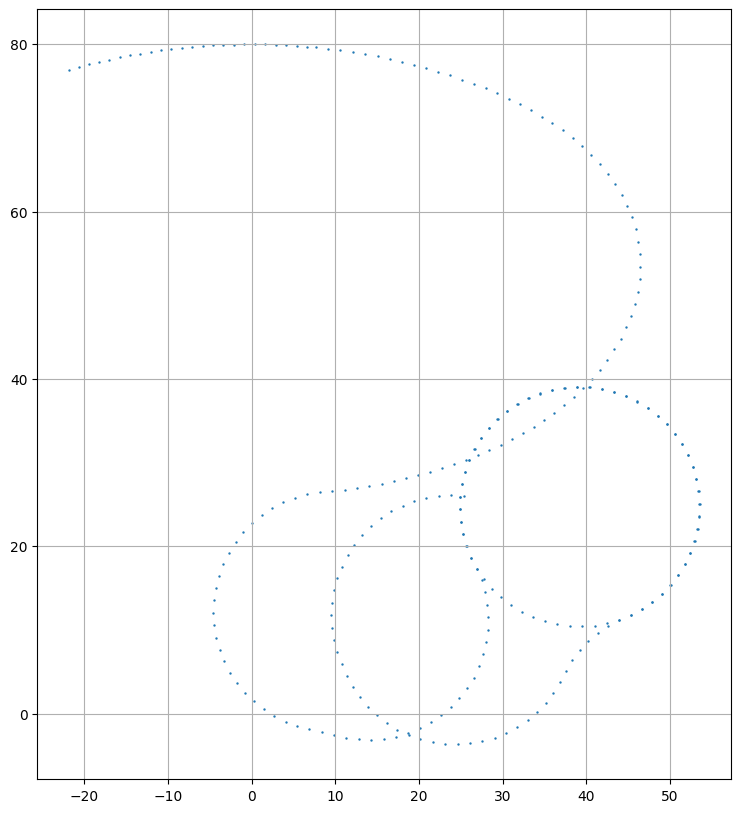

In [60]:
display([infinite_loop[816:1116]])
# plt.plot(infinite_loop['phase'][1110:1120])
# infinite_loop.iloc[0]


C:\Users\drago\AppData\Local\Temp\ipykernel_12968\2737061590.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(infinite_loop, x='x', y='y',cmap='inferno', shade=True, thresh=0.05)


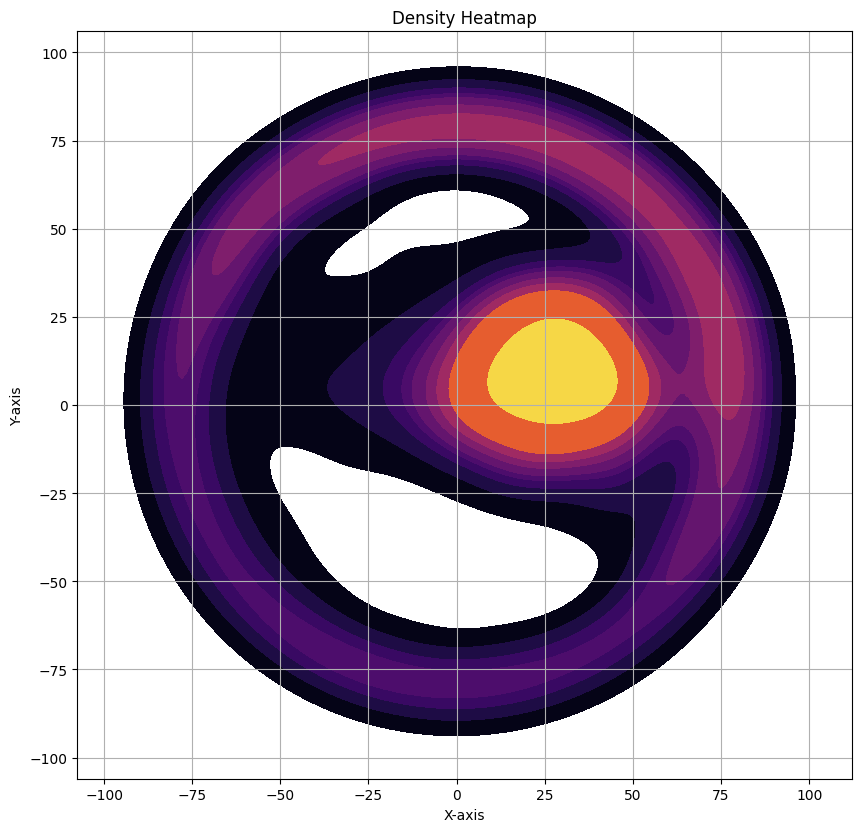

In [20]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.kdeplot(infinite_loop, x='x', y='y',cmap='inferno', shade=True, thresh=0.05)
plt.title('Density Heatmap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal')
plt.grid()

<Figure size 2000x2000 with 0 Axes>

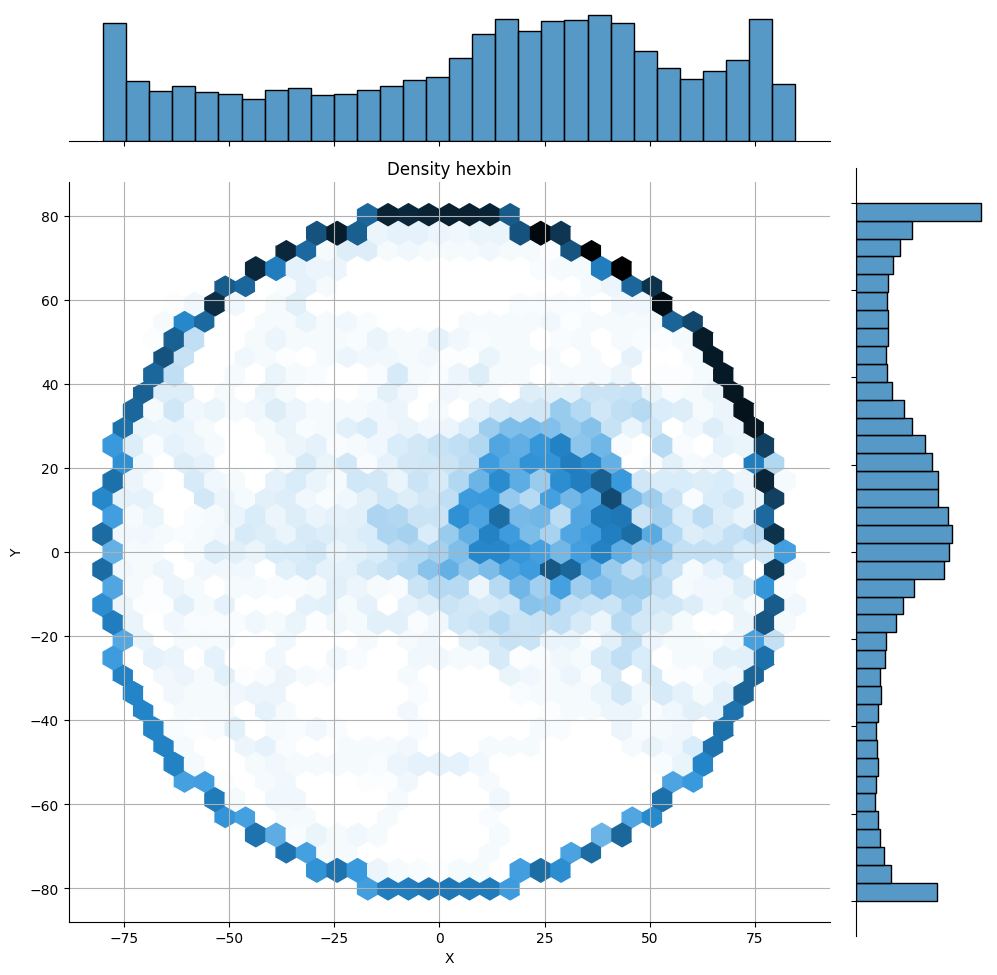

In [25]:
plt.figure(figsize=(20,20))
sns.jointplot(x=infinite_loop['x'], y=infinite_loop['y'], kind='hex', height=10)
plt.title('Density hexbin')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal')
plt.grid()

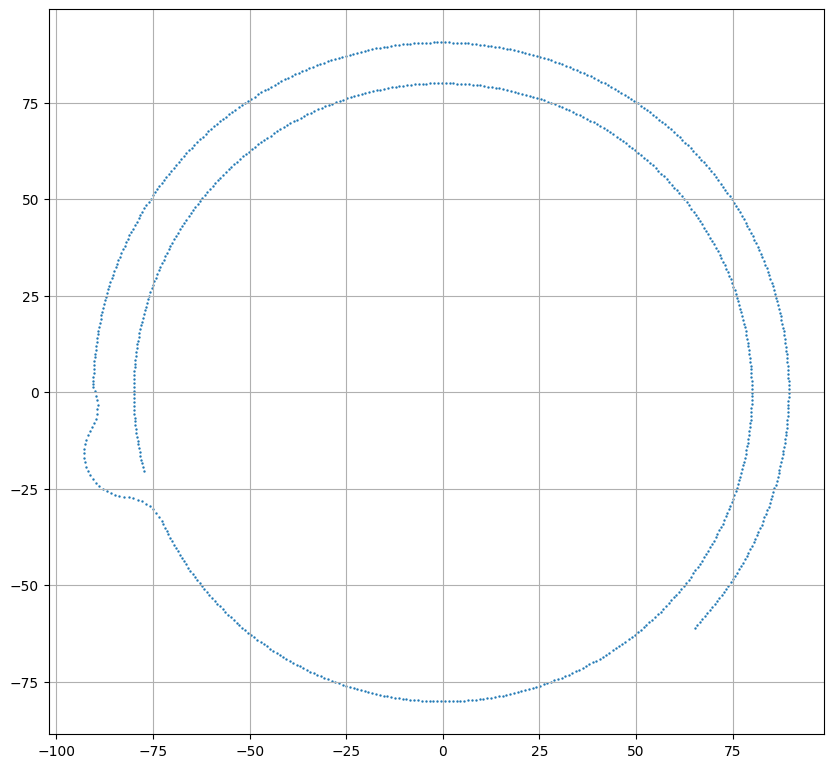

In [7]:
cp2 = pd.read_csv('CP2.csv')
display([cp2])